# Importing Packages & Cleaning Data

In [2]:
#Importing all the packages

import numpy as np
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt # library that enables plots and 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Text Preprocessing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
from string import punctuation
from nltk.stem import PorterStemmer


In [3]:
#Setting path for the file
path = Path.cwd() /"DisneylandReviews.csv"

In [4]:
#Loading data 
disney_data = pd.read_csv(path, encoding = 'latin-1', header = [0], 
                          skipinitialspace = True, index_col = 0,
                          na_values=['missing'])


In [5]:
#Dealing with Missing or Duplicated Data
disney_data.isnull().sum()
disney_data.duplicated().sum() ## Word Clouds

19

In [6]:
disney_data.drop_duplicates(inplace=True)

disney_data=disney_data.dropna().reset_index()
#print ("\nMissing values :  ", df.isnull().sum().values.sum())


# Exploring Data

In [7]:
disney_data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
40021,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris
40022,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris
40023,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris
40024,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris


In [11]:
disney_data['Branch'].value_counts()

Branch
Disneyland_California    18197
Disneyland_Paris         12693
Disneyland_HongKong       9136
Name: count, dtype: int64

In [12]:
disney_data['review length']=disney_data['Review_Text'].apply(lambda x:len(x))
disney_data['review length']

0         329
1         970
2         938
3         485
4         163
         ... 
40021    1574
40022    3593
40023    2537
40024    1758
40025     512
Name: review length, Length: 40026, dtype: int64

# Data Visualization

In [13]:
#hk_disney.shape
#Distribution of ranking
import seaborn as sns

sns.countplot(x='Sentiment', data=disney_data)
plt.title('Distribution of Sentiment')
plt.show()

#sns.countplot(x='Rating', data=pa_disney)
#plt.title('Distribution of ratings - Paris')
#plt.show()

#sns.countplot(x='Rating', data=ca_disney)
#plt.title('Distribution of ratings - California')
#plt.show()

ValueError: Could not interpret input 'Sentiment'

In [15]:
new = disney_data["Year_Month"].str.split("-", n = 1, expand = True) 
  
# making separate year column from new data frame 
disney_data["year"]= new[0] 
  
# making separate mounth column from new data frame 
disney_data["month"]= new[1] 
  
# Dropping old feature  
disney_data.drop(columns =["Year_Month"], inplace = True) 

KeyError: 'Year_Month'

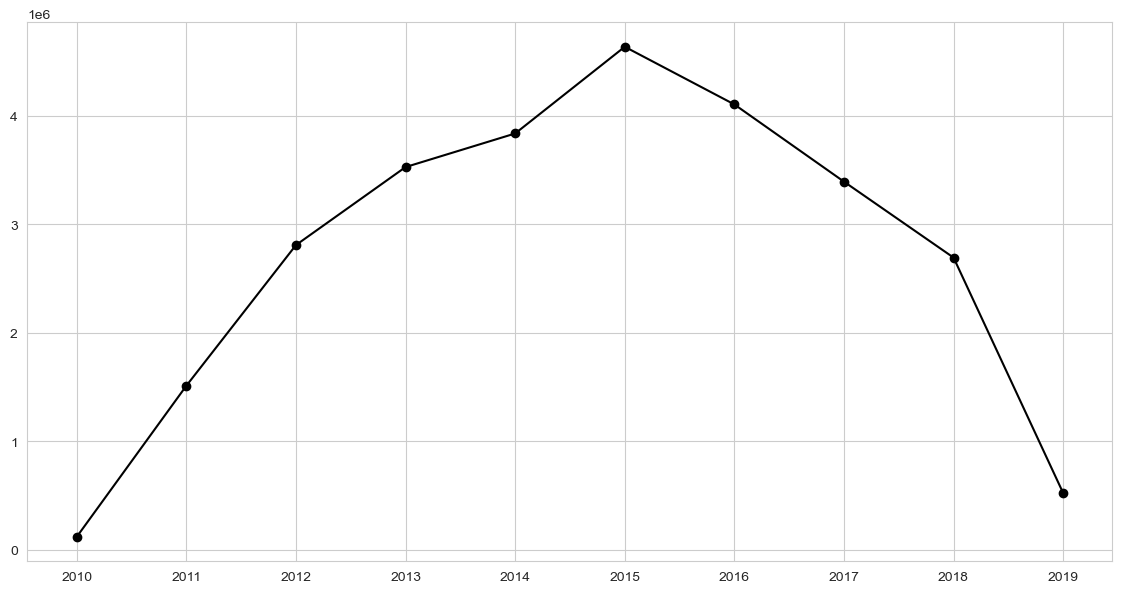

In [16]:
import seaborn as sns

sns.set_style("whitegrid")
#== 
df3=disney_data.groupby('year',as_index=False).agg({'review length':'sum'})
plt.figure(figsize=(14,7))
plt.plot(df3['year'] ,df3['review length'],marker='o',label='review length by year',color='black');

In [17]:
#Filtering the dataset according to branches

hk_disney = disney_data[disney_data['Branch'] == 'Disneyland_HongKong']
#making a new dataset where disneyland's branch will become the new column of disney-data
pa_disney = disney_data[disney_data['Branch'] == 'Disneyland_Paris']
ca_disney = disney_data[disney_data['Branch'] == 'Disneyland_California']

Text(0, 0.5, 'Ratings')

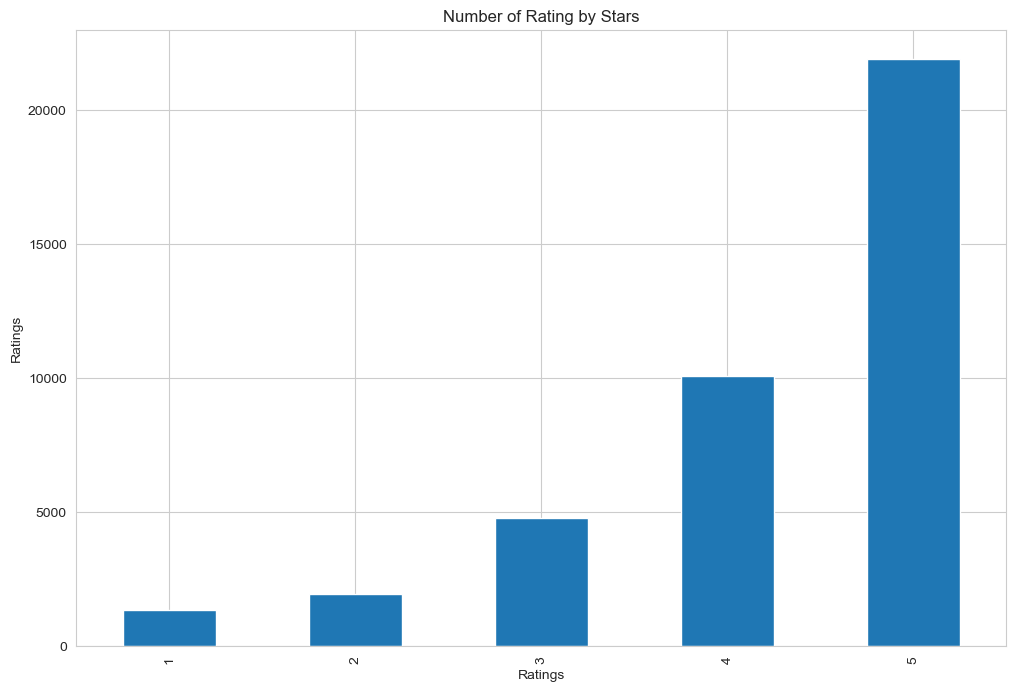

In [18]:
disney_data.Rating.value_counts().sort_index().\
    plot(kind="bar", title="Number of Rating by Stars", figsize=(12, 8))
plt.xlabel("Ratings")
plt.ylabel("Ratings")

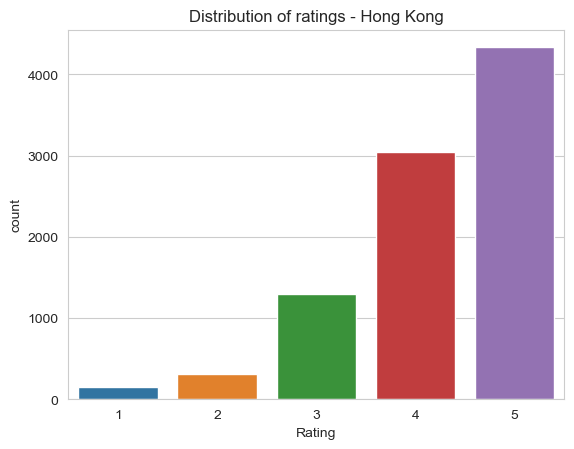

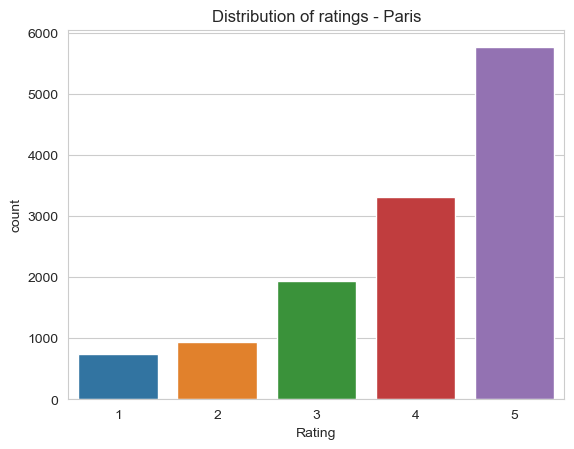

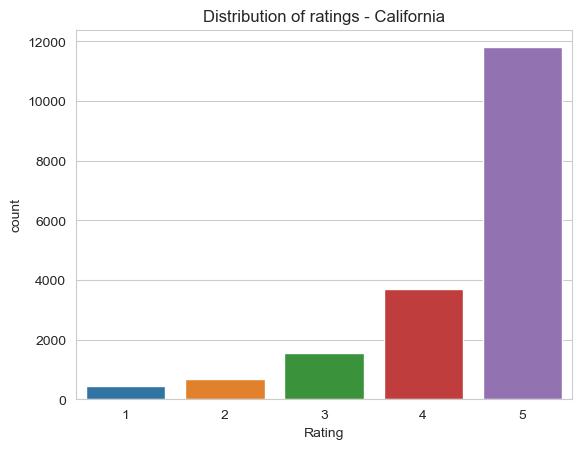

In [19]:
hk_disney.shape
#Distribution of ranking

sns.countplot(x='Rating', data=hk_disney)
plt.title('Distribution of ratings - Hong Kong')
plt.show()

sns.countplot(x='Rating', data=pa_disney)
plt.title('Distribution of ratings - Paris')
plt.show()

sns.countplot(x='Rating', data=ca_disney)
plt.title('Distribution of ratings - California')
plt.show()

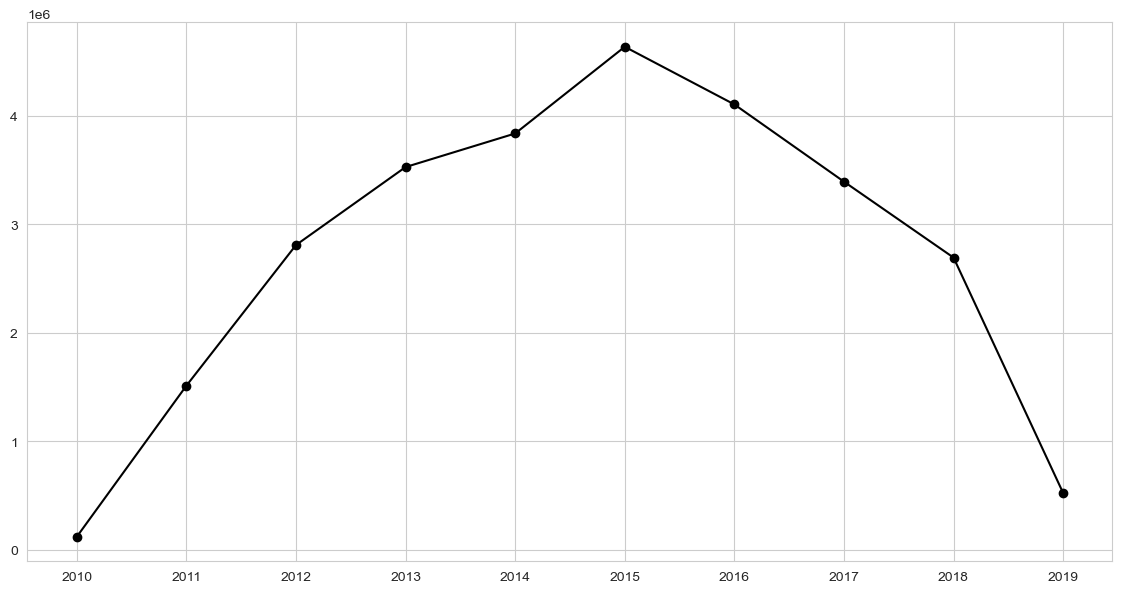

In [20]:
sns.set_style("whitegrid")

df3=disney_data.groupby('year',as_index=False).agg({'review length':'sum'})
plt.figure(figsize=(14,7))
plt.plot(df3['year'] ,df3['review length'],marker='o',label='review length by year',color='black');

# Sentimental Analysis

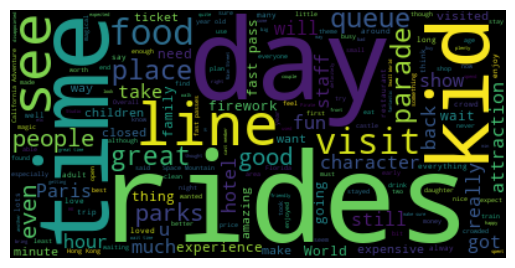

In [21]:
#Storing all the Review Text Column data into the txt. 

#fillna : Fill N/A replaces any NAN- "Not a Number" values with an empty string ' '
txt = ''.join(disney_data["Review_Text"].fillna(' '))


#Removing stopwords
filter_out = set(STOPWORDS)
filter_out.update(['park', 'ride', 'went', 'lot', 'Disneyland', 'go', 'one', 'Disney', 'the'])
#updating the filter_out function besides the regular stopwords

#Create and generate a word cloud image:
wordcloud = WordCloud(stopwords= filter_out).generate(txt)

#Display the generated image
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Creating Preprocessed Text Function that can tokenize and lemmatize the tokens

def preprocessed_txt(text):
    #tokenizes words and converts all characters to lowercase 
    orig_tokens = word_tokenize(text.lower())
    
    #filters out stopwords
    filtered_tokens = [token for token in orig_tokens if token not in stopwords.words("english")]
    
    #lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    #reducing the words to their root form
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
   
    #join the tokens back into a string 
    # with a space bar between each tokenized word
    proc_txt = ' '.join(lemmatized_tokens)
   
    return proc_txt


In [ ]:
#Apply the function 
disney_data['Review_Text'] = disney_data['Review_Text'].apply(preprocessed_txt)


In [ ]:
#Extracting positive reviews (with rating of 5)

pos_rating_sentiment = disney_data[disney_data['Rating']==5]
pos_rating_sentiment
#creating a positive rating Review Text String
positive_rating = ''.join(pos_rating_sentiment['Review_Text'].fillna(' '))

#Create and generate a word cloud image:
positive_rating_wordcloud = WordCloud(stopwords= filter_out).generate(positive_rating)

#Display the generated image
plt.imshow(positive_rating_wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()


In [ ]:
neg_rating = disney_data[disney_data['Rating']==1]
neg_rating
neg_rating_txt = ''.join(neg_rating['Review_Text'].fillna(' '))

#Create and generate a word cloud image:
negative_rating_wordcloud = WordCloud(stopwords= filter_out).generate(neg_rating_txt)

#Display the generated image
plt.imshow(negative_rating_wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
negative_sentiment = disney_data[disney_data['Sentiment']==0]#['Review_Text']
#negative_sentiment

#disney_data
negative_txt = ''.join(positive_sentiment['Review_Text'].fillna(' '))
negative_txt

In [ ]:
#Create and generate a word cloud image:
negative_wordcloud = WordCloud(stopwords= filter_out).generate(negative_txt)

#Display the generated image
plt.imshow(negative_wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
mickey_mask = np.array(Image.open('./mickey.jpg'))
mickey_mask

In [ ]:
review = disney_data["Review_Text"]


adjectives_filtered = [] # initializes an empty list, where transformed texts will be saved
for Review_Text in review:
    sentences = nltk.sent_tokenize(Review_Text)
    adjectives = []
    
    
    for sentence in sentences:
        words = nltk.word_tokenize(sentence) 
        words_tagged = nltk.pos_tag(words)
        
        adj_add = [adjectives.append(word_tagged[0]) for word_tagged in words_tagged if word_tagged[1] == "JJ"]
                
    adjectives_filtered.append(" ".join(adjectives)) 

In [ ]:
adjectives_filtered

In [ ]:
positive_rating_review = pos_rating_sentiment["Review_Text"]

positive_rating_adjectives = []
for Review_Text in positive_rating_review:
    positive_rating_sentences = nltk.sent_tokenize(Review_Text)
    positive_adjectives = []
    
    for positive_sentence in positive_rating_sentences:
        words = nltk.word_tokenize(positive_sentence)
        words_tagged = nltk.pos_tag(words)
        
        adj_add = [adjectives.append(words_tagged[0]) for words_tagged in words_tagged if words_tagged[1] = "JJ"]
        
    adjectives_filtered.append("".join(positive_rating_adjectives))

In [ ]:
#Convert list of adjectives into string: 
adj_string= ' '.join(adjectives_filtered) 

In [ ]:
#Create and generate a word cloud image:
wordcloud_adj = WordCloud(max_font_size=50, max_words=100, background_color="red").generate(adj_string)

#Display the generated image
plt.imshow(wordcloud_adj, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud_adj_50 = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(adj_string)
plt.imshow(wordcloud_adj_50, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
mickey_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black", mask = mickey_mask, 
                             contour_width = 1, contour_color = 'black', colormap = 'BuPu_r', 
                             width = 800, height = 500).generate(adj_string)
plt.imshow(wordcloud_adj_50, interpolation = 'bilinear')

plt.axis("off")
plt.imshow(mickey_wordcloud)